# 2.5 Google Colab - Algoritmos de mejoramiento de imágenes basado por pixeles
### Computer Vision for Images and Video (TC4033 - Group 10)

- **School**: School of Engineering and Sciences, Tecnológico de Monterrey
- **Lead Professor**: Dr. Gilberto Ochoa Ruiz
- **Assistant Professor**: MIP Ma. del Refugio Melendez Alfaro
- **Tutor Professor**: Iván Reyes Amezcua
- **Team 5**:
  - Benjamin Cisneros Barraza - A01796323
  - Jonatan Israel Meza Mendoza - A01275322
  - Carlos Pano Hernández - A01066264
  - Edgar Omar Cruz Mendoza - A01795590
- **Date**: Sunday, September 21th, 2025


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [3]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

In [4]:
# Load images
try:
    img1 = mpimg.imread('data/img1.jpg')
    img2 = mpimg.imread('data/img2.jpg')
    img3 = mpimg.imread('data/img3.jpg')
    print('Images loaded successfully!')
    print('Image 1 shape:', img1.shape)
    print('Image 2 shape:', img2.shape)
    print('Image 3 shape:', img3.shape)
except FileNotFoundError as e:
    print(f"Error loading images: {e}. Please ensure the 'data' folder is in the same directory as this notebook and contains the required images.")
    # Handle gracefully if images are not found
    img1, img2, img3 = None, None, None

Images loaded successfully!
Image 1 shape: (3464, 4618, 3)
Image 2 shape: (3024, 4032, 3)
Image 3 shape: (4032, 3024, 3)


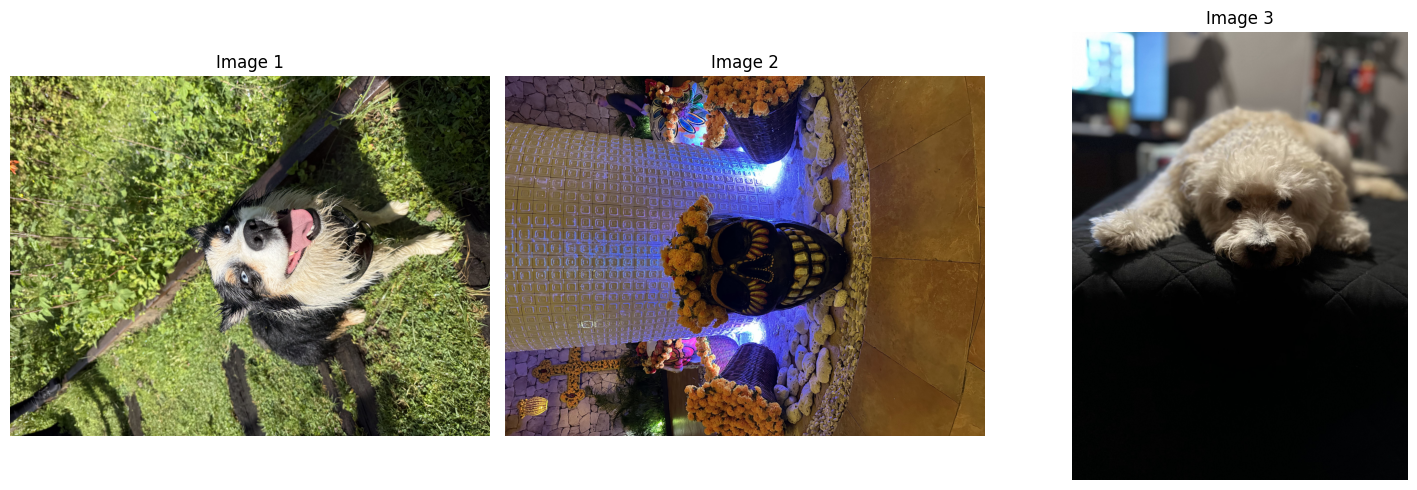

In [3]:
# Display the selected images
if img1 is not None and img2 is not None and img3 is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')

    axes[2].imshow(img3)
    axes[2].set_title('Image 3')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

### Exercise 1
Research and implement the tile-based histogram equalization method. 

In these methods, the image is partitioned into different windows (i.e., tiles), and histograms are calculated independently for each window, applying the correction to each tile. There is a trade-off between the window size and computational complexity, making this method more complex than the simple approach. 

Implement this version and perform some tests by varying the window size. Another drawback is that you may observe noticeable differences in contrast between the blocks; how could this be improved?

# -------------------------------

## Tile-Based Histogram Equalization (CLAHE)

**Tile-based histogram equalization**, specifically the **Contrast-Limited Adaptive Histogram Equalization (CLAHE)** method, is a technique to improve contrast in images. Unlike global histogram equalization, which calculates a single histogram for the entire image, CLAHE divides the image into smaller, non-overlapping regions called **tiles**. 

The CLAHE method addresses the limitations of simple adaptive histogram equalization (AHE) by preventing the amplification of noise and ensuring smooth transitions between tiles. This method works by:

- **Tiling:** The input image is divided into a grid of rectangular tiles. The size of these tiles is a crucial parameter. A larger tile size results in a more uniform equalization, similar to the global method, while a smaller size provides more localized contrast enhancement.

- **Local Equalization:** A histogram is computed for each tile. A key step in CLAHE is to **clip** this histogram at a predefined limit. This prevents any single intensity value from having a disproportionately high frequency, which would cause over-enhancement and noise amplification. After clipping, the histogram is normalized, and a separate mapping function is generated for each tile.

- **Interpolation:** To eliminate the artificial boundaries that can appear between tiles due to independent processing, CLAHE uses **bilinear interpolation**. This process smooths the transition between adjacent tiles by blending the equalization results from the surrounding tiles, creating a seamless and natural-looking final image. 

This approach is particularly effective for images where the contrast varies significantly across different regions, revealing details in both bright and dark areas simultaneously.

### Implementation and Parameter Testing

In [4]:
# Creating our CLAHE function. Receives an image, a clip limit and a tile grid size.
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Applies Contrast-Limited Adaptive Histogram Equalization (CLAHE).

    Parameters:
    - image: The input grayscale image.
    - clip_limit: The contrast clipping threshold. A higher value means more contrast.
    - tile_grid_size: The size of the tile grid (width, height).

    Returns:
    - The processed image.
    """
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply CLAHE to the image
    processed_image = clahe.apply(image)

    return processed_image


Processing Image 1...


C:\Users\jonat\AppData\Local\Temp\ipykernel_37960\3437559743.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


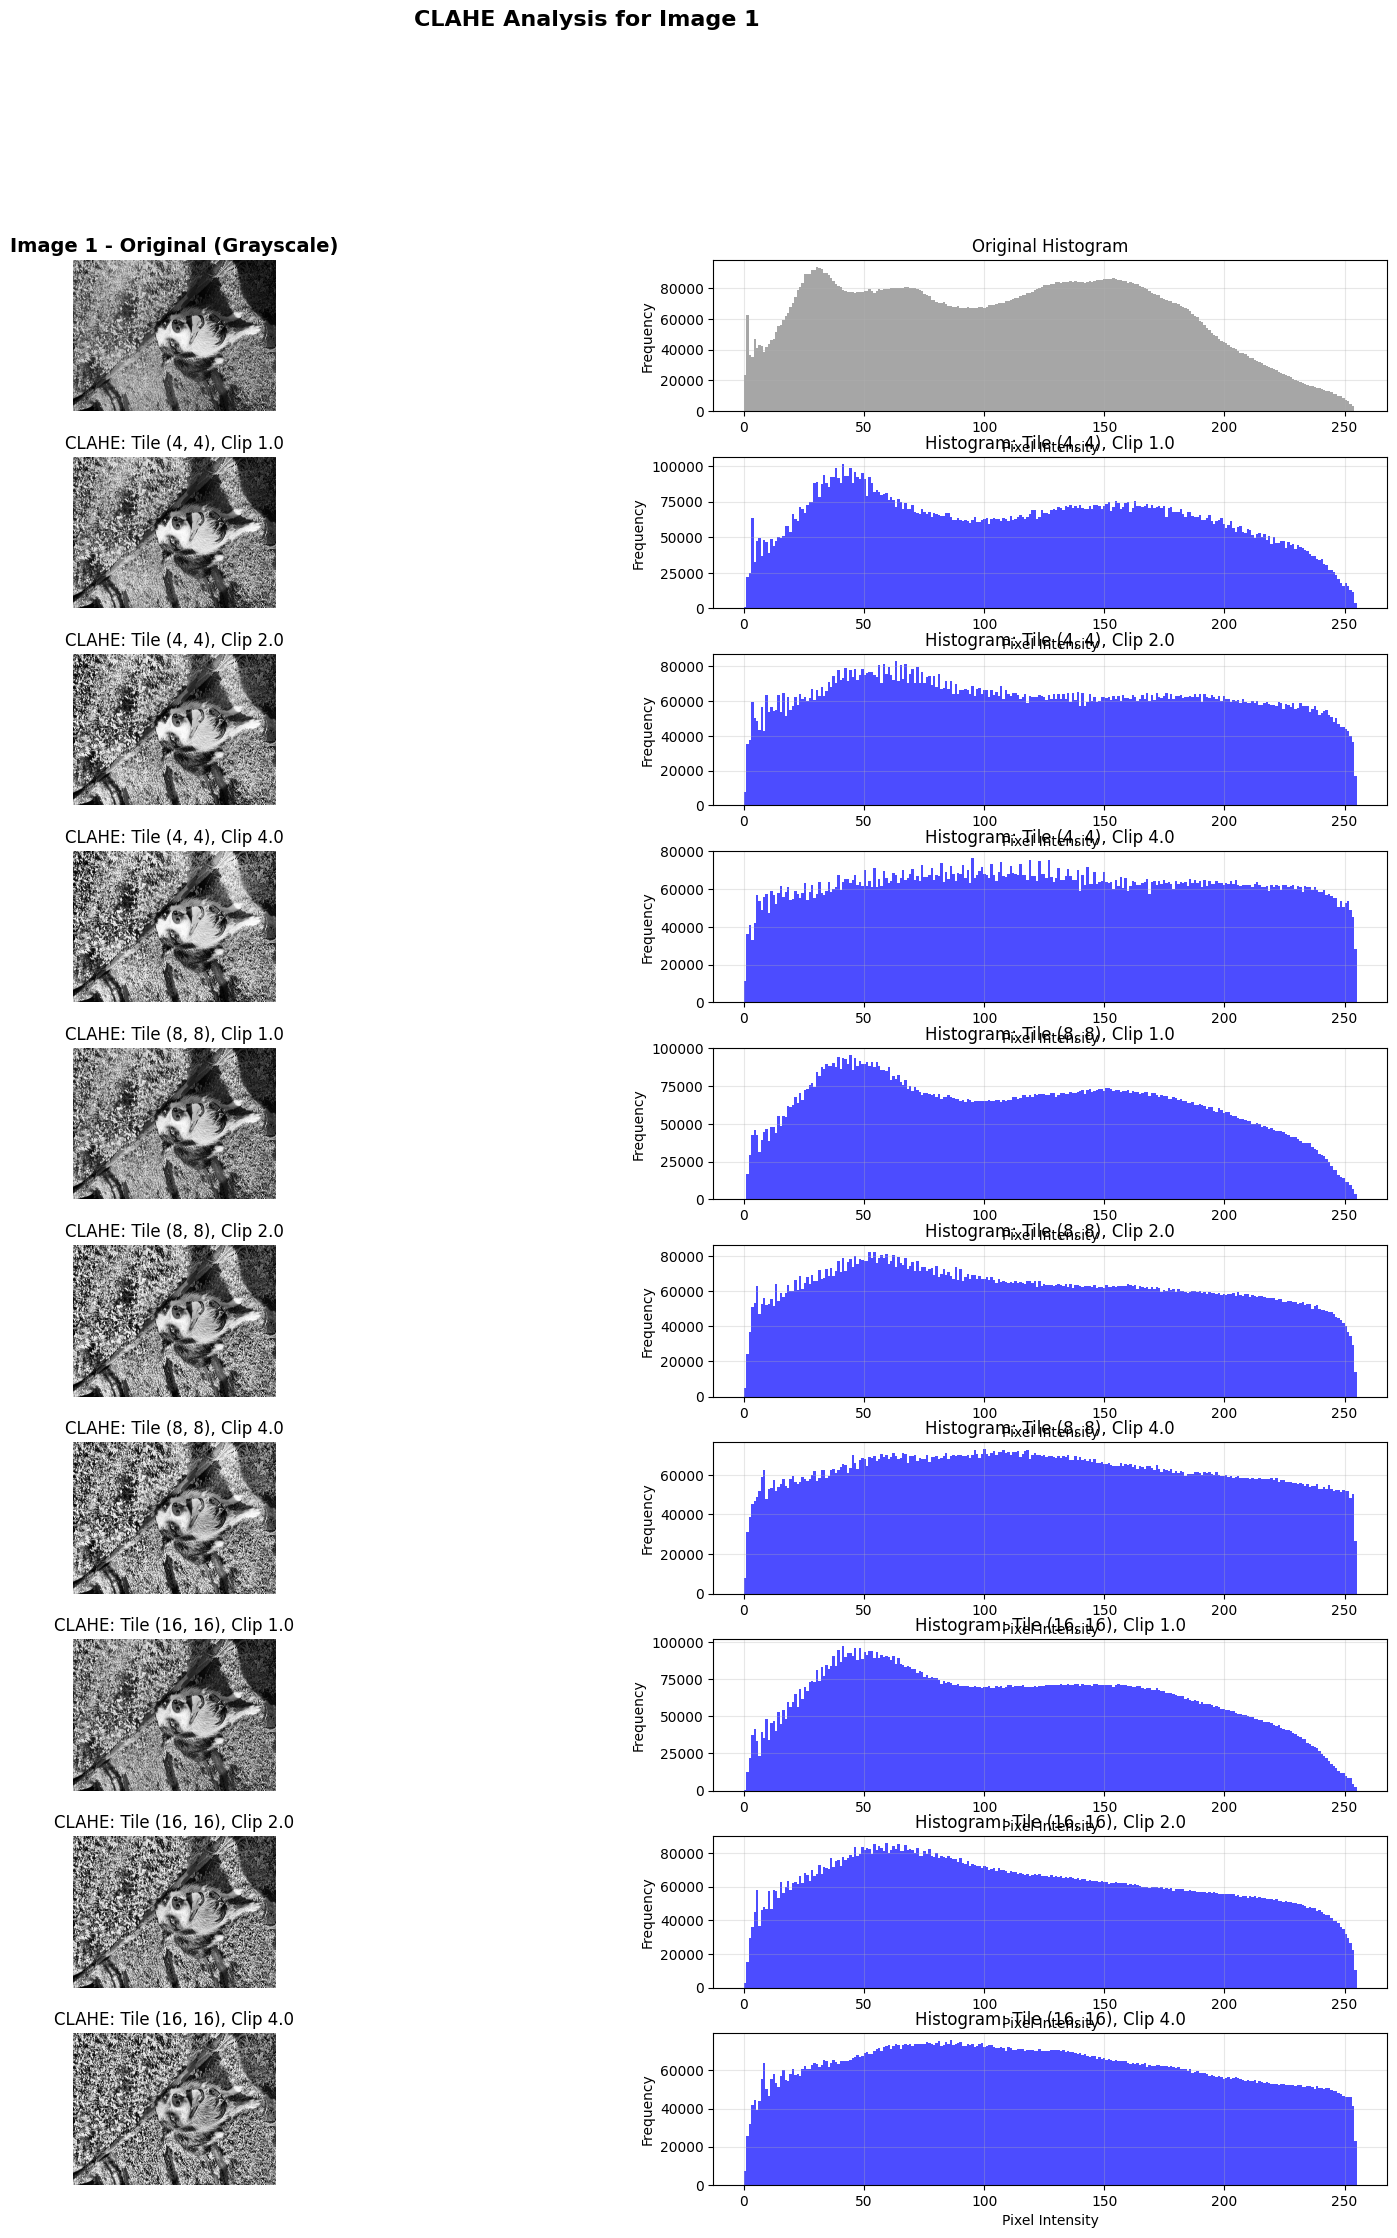


Image 1 - Statistical Analysis:
Original - Mean: 110.41, Std: 62.25
Best CLAHE - Tile: (4, 4), Clip: 2.0
Best CLAHE - Mean: 123.45, Std: 71.19
Contrast Improvement: 14.4%

Processing Image 2...


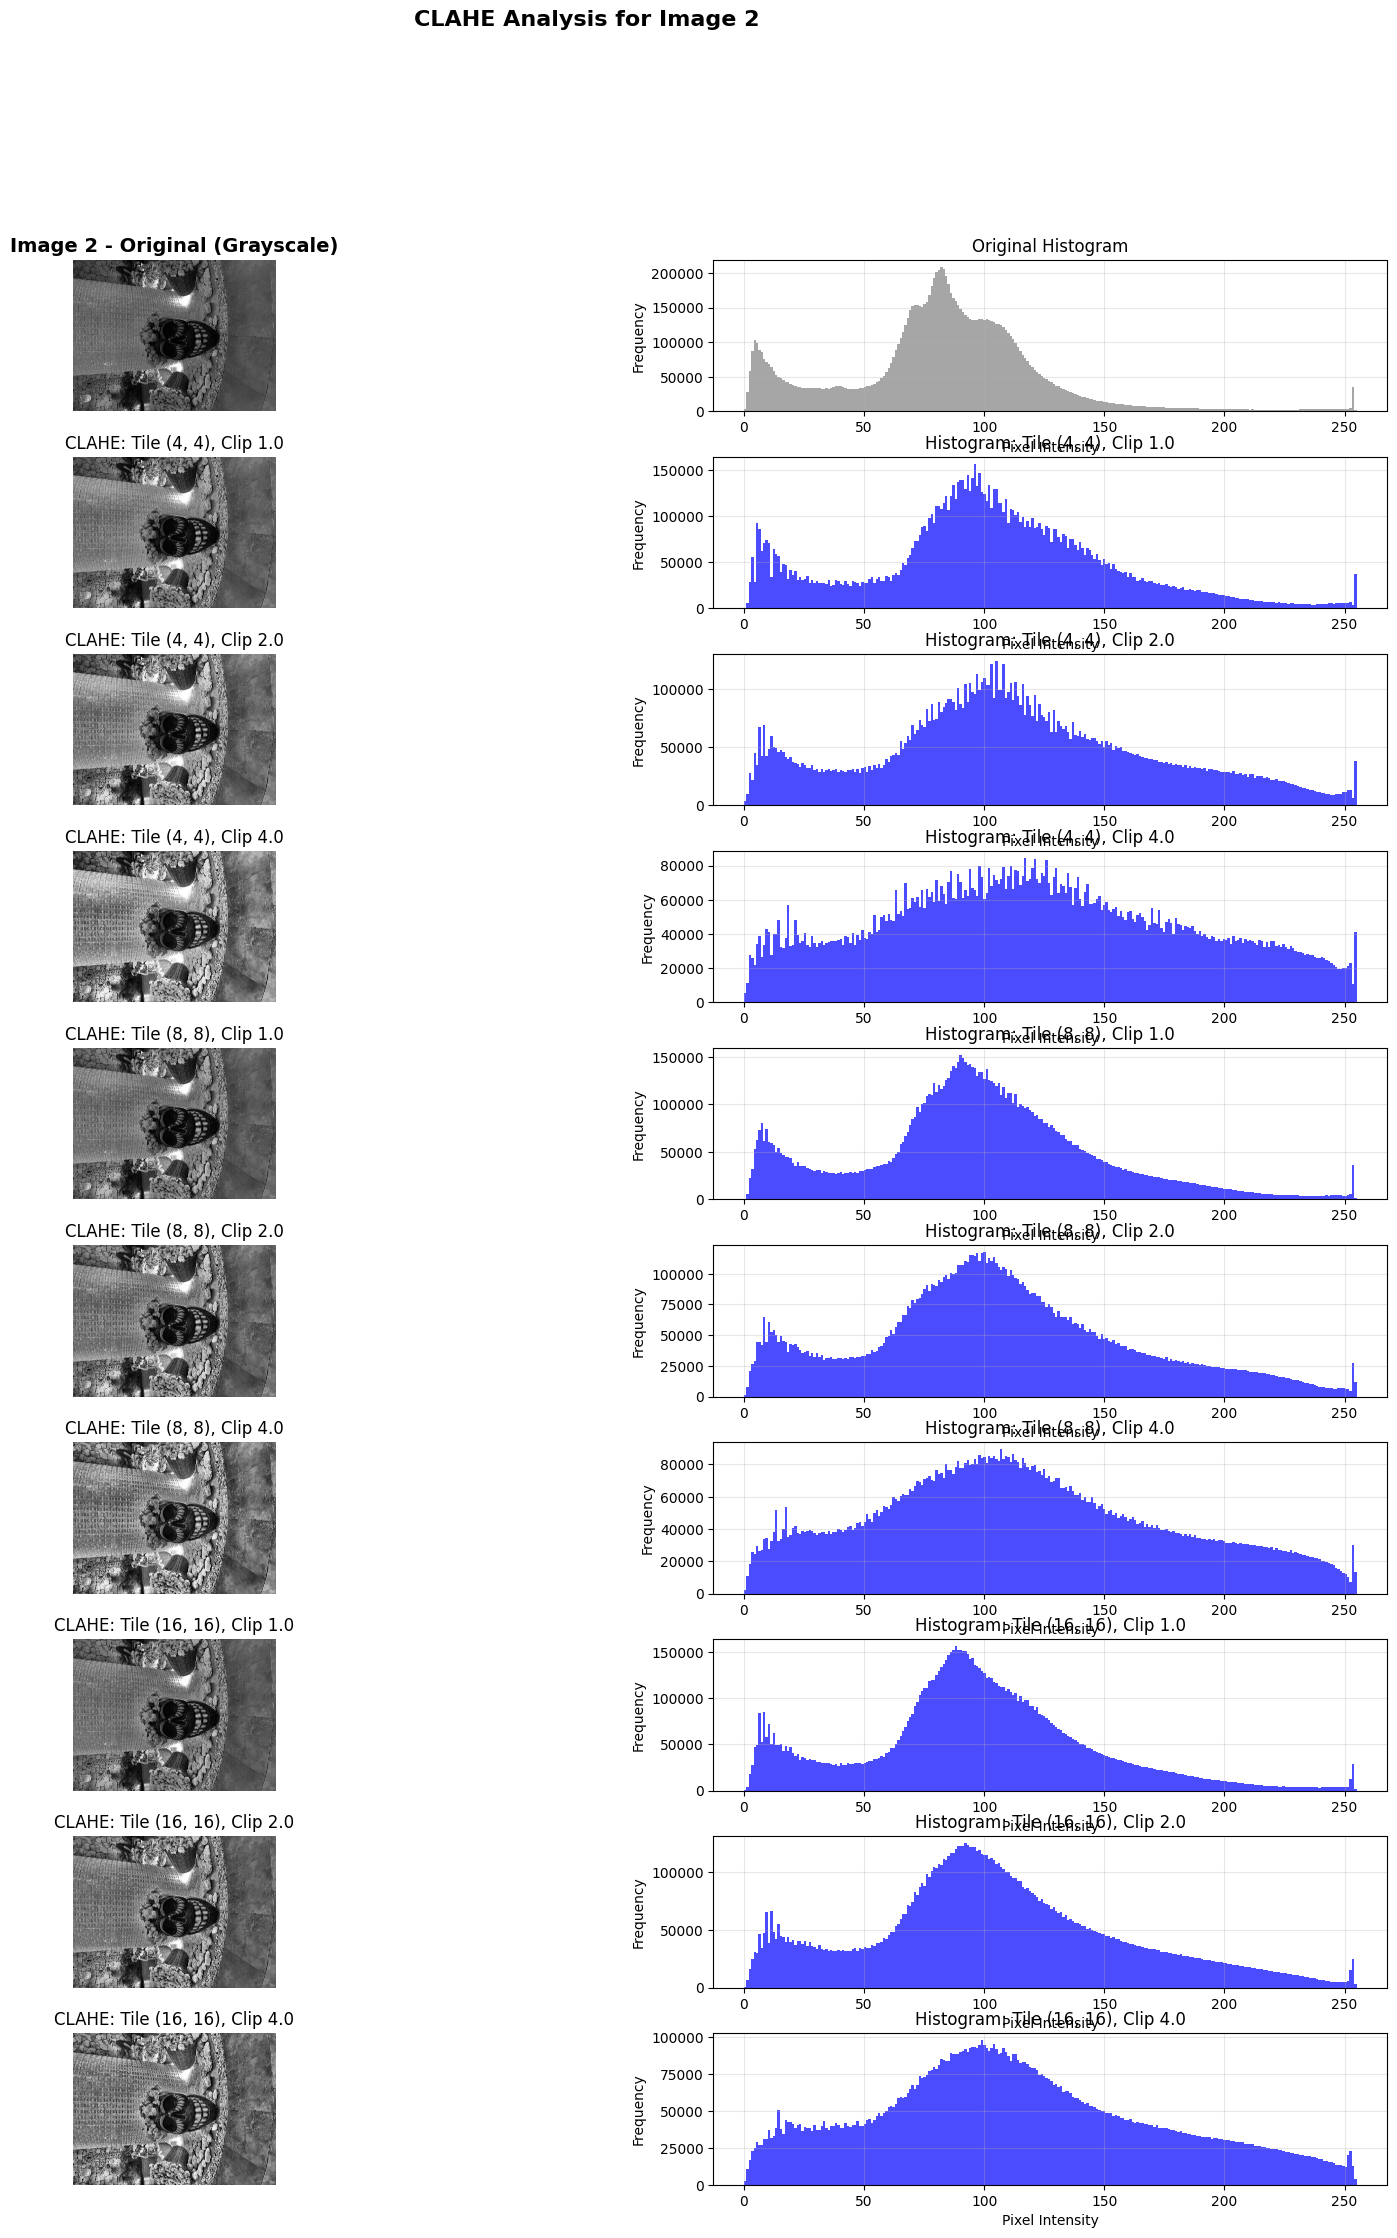


Image 2 - Statistical Analysis:
Original - Mean: 82.35, Std: 41.08
Best CLAHE - Tile: (4, 4), Clip: 4.0
Best CLAHE - Mean: 121.63, Std: 63.24
Contrast Improvement: 53.9%

Processing Image 3...


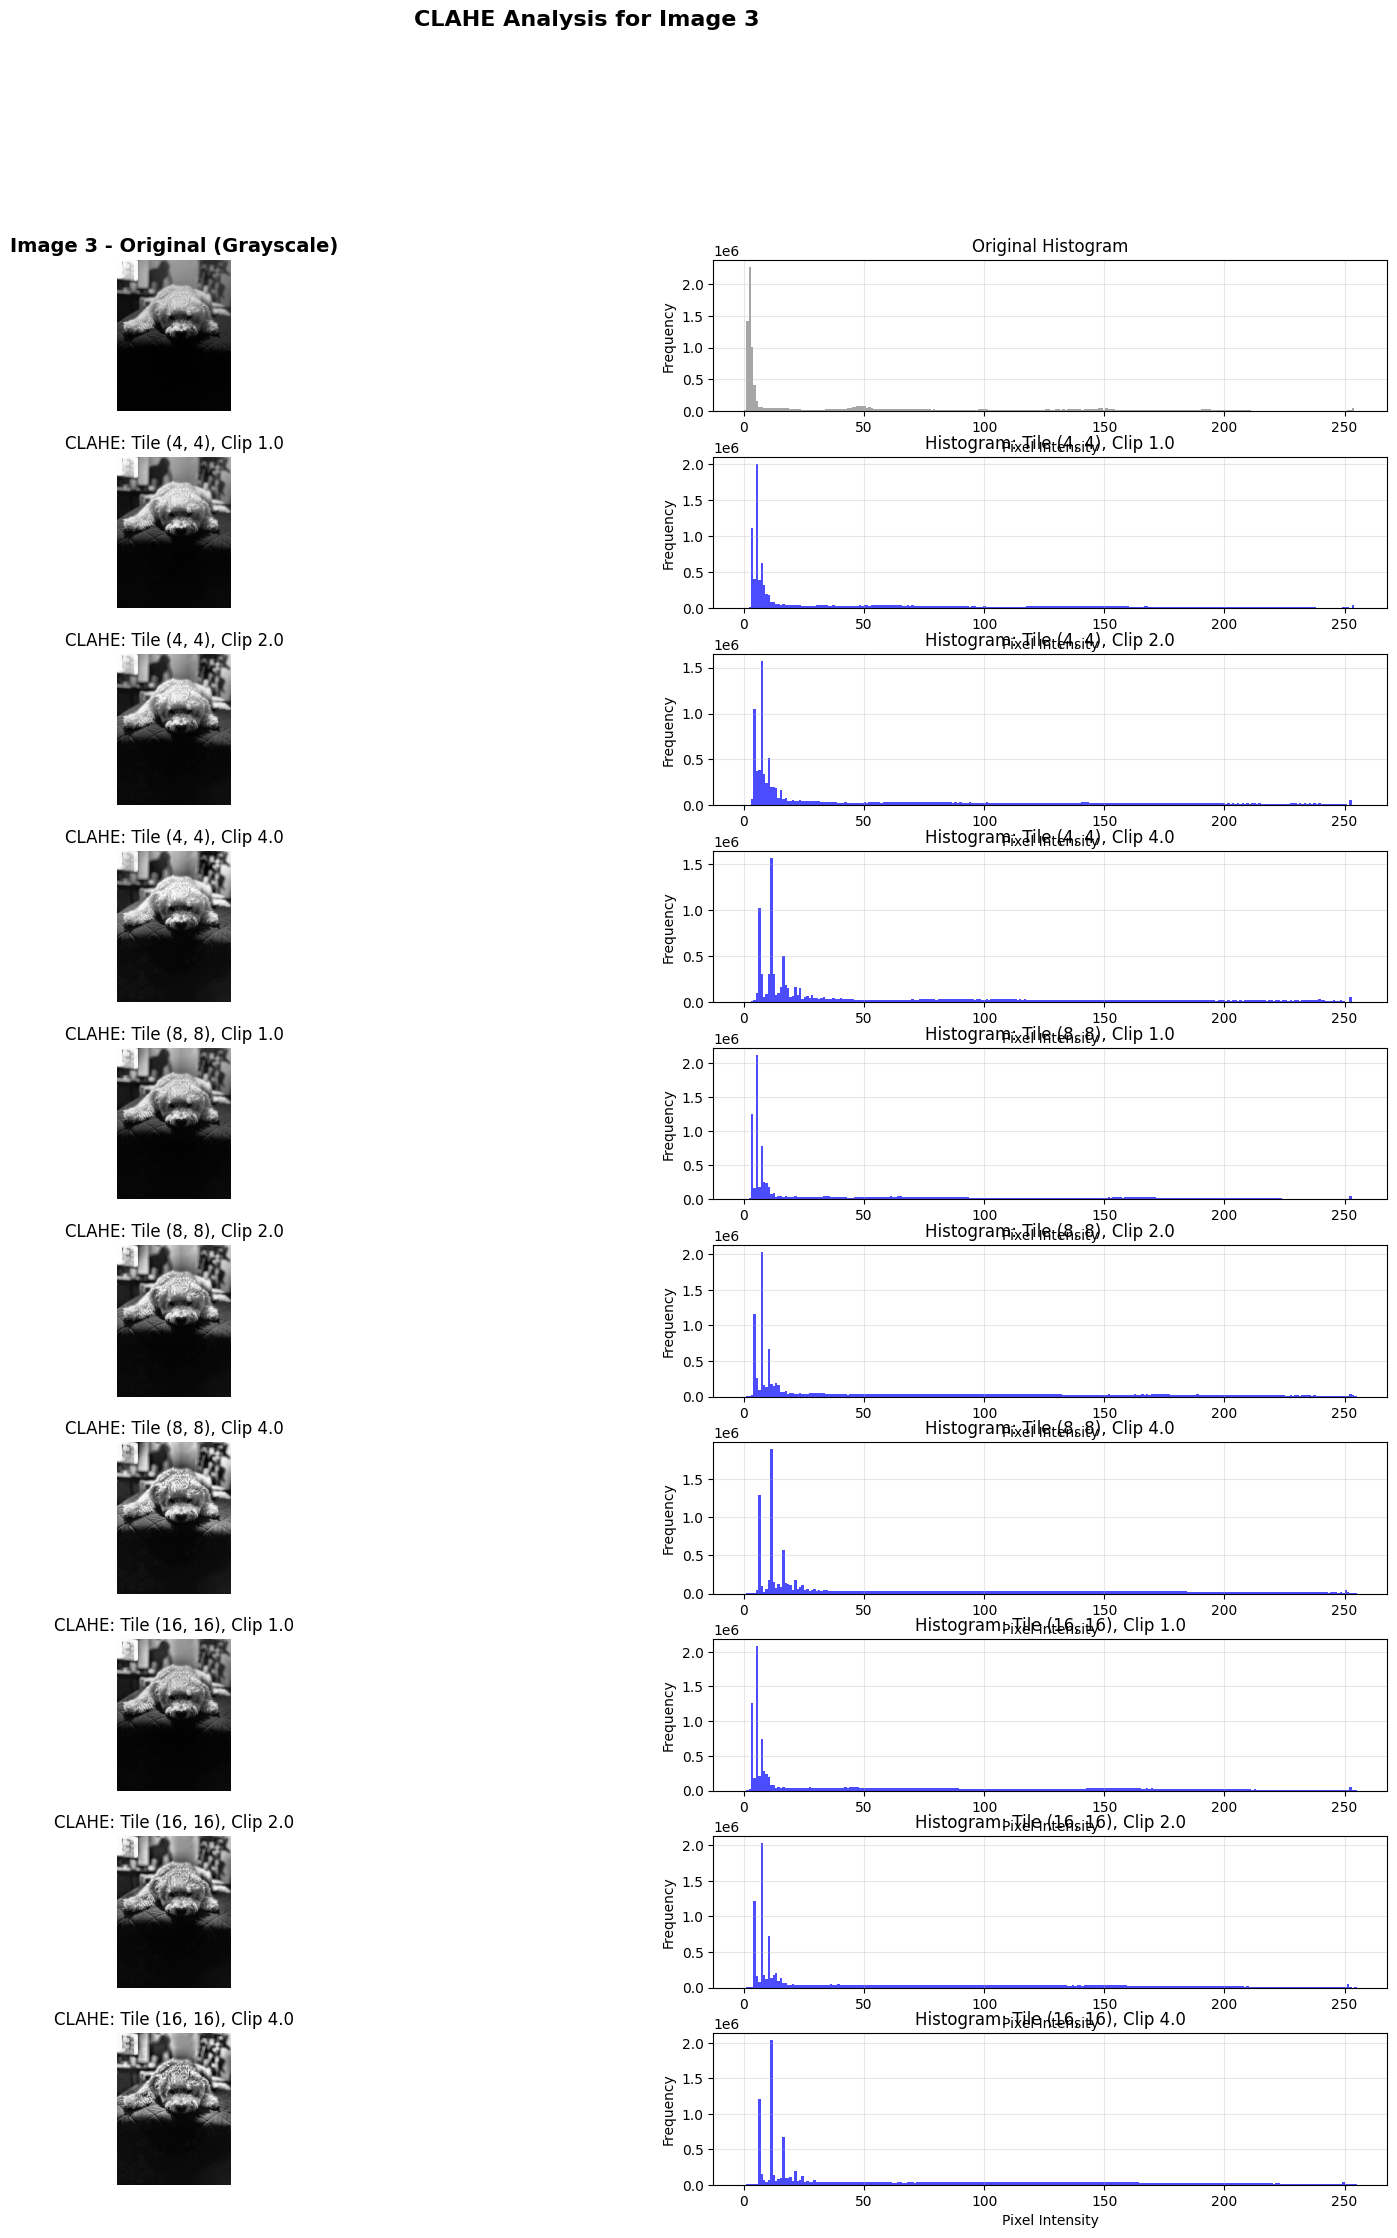


Image 3 - Statistical Analysis:
Original - Mean: 58.41, Std: 69.66
Best CLAHE - Tile: (4, 4), Clip: 4.0
Best CLAHE - Mean: 73.67, Std: 75.22
Contrast Improvement: 8.0%


In [5]:
if img1 is not None and img2 is not None and img3 is not None:
    try:
        # Convert images to grayscale for CLAHE processing
        img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
        img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
        img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
        
        # Vary the window size and contrast limits for testing
        sizes = [(4, 4), (8, 8), (16, 16)]
        clip_limits = [1.0, 2.0, 4.0]
        
        images = [img1_gray, img2_gray, img3_gray]
        image_names = ['Image 1', 'Image 2', 'Image 3']
        
        for img_idx, (img_gray, img_name) in enumerate(zip(images, image_names)):
            print(f"\nProcessing {img_name}...")
            
            # Create a comprehensive figure with images and histograms
            fig = plt.figure(figsize=(20, 25))
            
            # Create grid layout: 2 columns (image + histogram) for each row
            gs = fig.add_gridspec(len(sizes) * len(clip_limits) + 1, 2, hspace=0.3, wspace=0.3)
            
            # Original image and histogram
            ax_img = fig.add_subplot(gs[0, 0])
            ax_hist = fig.add_subplot(gs[0, 1])
            
            ax_img.imshow(img_gray, cmap='gray')
            ax_img.set_title(f"{img_name} - Original (Grayscale)", fontsize=14, fontweight='bold')
            ax_img.axis('off')
            
            # Original histogram
            ax_hist.hist(img_gray.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
            ax_hist.set_title(f"Original Histogram", fontsize=12)
            ax_hist.set_xlabel('Pixel Intensity')
            ax_hist.set_ylabel('Frequency')
            ax_hist.grid(True, alpha=0.3)
            
            plot_index = 1
            
            for size in sizes:
                for clip in clip_limits:
                    processed_image = apply_clahe(img_gray, clip_limit=clip, tile_grid_size=size)
                    
                    # Image subplot
                    ax_img = fig.add_subplot(gs[plot_index, 0])
                    ax_img.imshow(processed_image, cmap='gray')
                    ax_img.set_title(f"CLAHE: Tile {size}, Clip {clip}", fontsize=12)
                    ax_img.axis('off')
                    
                    # Histogram subplot
                    ax_hist = fig.add_subplot(gs[plot_index, 1])
                    ax_hist.hist(processed_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
                    ax_hist.set_title(f"Histogram: Tile {size}, Clip {clip}", fontsize=12)
                    ax_hist.set_xlabel('Pixel Intensity')
                    ax_hist.set_ylabel('Frequency')
                    ax_hist.grid(True, alpha=0.3)
                    
                    plot_index += 1
            
            plt.suptitle(f"CLAHE Analysis for {img_name}", fontsize=16, fontweight='bold', y=0.98)
            plt.tight_layout()
            plt.show()
            
            # Statistical analysis
            print(f"\n{img_name} - Statistical Analysis:")
            print(f"Original - Mean: {img_gray.mean():.2f}, Std: {img_gray.std():.2f}")
            
            # Test different parameters and show best results
            best_contrast = 0
            best_params = None
            best_image = None
            
            for size in sizes:
                for clip in clip_limits:
                    test_img = apply_clahe(img_gray, clip_limit=clip, tile_grid_size=size)
                    contrast = test_img.std()  # Standard deviation as contrast measure
                    if contrast > best_contrast:
                        best_contrast = contrast
                        best_params = (size, clip)
                        best_image = test_img
            
            print(f"Best CLAHE - Tile: {best_params[0]}, Clip: {best_params[1]}")
            print(f"Best CLAHE - Mean: {best_image.mean():.2f}, Std: {best_image.std():.2f}")
            print(f"Contrast Improvement: {((best_contrast - img_gray.std()) / img_gray.std() * 100):.1f}%")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

## How to Improve the Contrast Between Blocks

The primary drawback of a simple tile-based histogram equalization (AHE) is the potential for **noticeable differences in contrast between blocks**, resulting in a grid-like artifact. The implementation we used, **CLAHE**, already incorporates the key improvements to solve this issue:

1.  **Contrast Limiting**: By using a `clip_limit`, CLAHE prevents any single histogram bin from having an extremely high count. This stops the algorithm from aggressively amplifying contrast in uniform regions (like a clear sky), which would otherwise lead to noise amplification and sharp contrast differences between tiles.

2.  **Bilinear Interpolation**: This is the most critical feature. Instead of simply applying the equalization function for each tile and then putting the image back together, CLAHE calculates the final pixel value by **interpolating** the results from the four surrounding tiles. This creates a smooth, continuous transition across tile boundaries, effectively eliminating the grid artifacts. 


## CLAHE Best Practices and Usage Guidelines

### When to Use CLAHE:
1. **Low-contrast images**: When global histogram equalization fails to reveal details in both bright and dark areas simultaneously.
2. **Medical imaging**: Enhances X-rays, CT scans, and MRI images where local contrast is crucial for diagnosis.
3. **Satellite imagery**: Improves contrast in aerial photos with varying lighting conditions.
4. **Photography**: Can be used to create an HDR-like effect, bringing out details in shadows and highlights from a single exposure.
5. **Computer vision preprocessing**: An excellent preprocessing step to enhance images before applying feature detection, object recognition, or segmentation algorithms.

### Parameter Selection Guide:

#### Clip Limit (Contrast Limiting):
- **1.0-2.0**: **Conservative**, preserves a more natural look while providing a subtle enhancement.
- **2.0-3.0**: A **balanced** enhancement, often the recommended starting point.
- **3.0-4.0**: **Aggressive** enhancement; may introduce artifacts but can be useful for very low-contrast images.
- **>4.0**: Usually too aggressive, with a high risk of amplifying noise and creating unnatural results.

#### Tile Grid Size:
- **(4,4)**: Provides **very local adaptation** and is good for revealing fine details, but may create more visible artifacts if the clip limit is high.
- **(8,8)**: Offers a **good balance** between local and global adaptation and is the recommended starting point.
- **(16,16)**: Provides a **smoother** result with more global adaptation, similar to regular histogram equalization but with more local control.
- **(32,32)**: Very global; the effect will be very similar to regular histogram equalization, losing the benefits of a tiled approach.

### Best Practices:
1. **Start with (8,8) tiles and a clip limit of 2.0.**
2. **Adjust the clip limit first, then the tile size**, to find the optimal balance between contrast enhancement and noise.
3. **Be mindful of over-enhancement artifacts**, which can make the image look artificial or "grainy."
4. **Use statistical measures** like standard deviation to objectively quantify the contrast improvement.


### Exercise 2
Research and implement a simple method for Sliding Window Adaptive Histogram Equalization (SWAHE), and compare its results on several images of different types.

# -------------------------------

### Exercise 3
Research how the CLAHE algorithm (Contrast Limited Adaptive Histogram Equalization) works and implement it (you may use the OpenCV implementation). Test it on different types of images and compare the results with the basic histogram equalization method. Provide a brief description of the method based on your literature review.

# -------------------------------

### Objective
The goal of this exercise is to investigate the **Contrast Limited Adaptive Histogram Equalization (CLAHE)** algorithm, describe its functioning based on bibliographic research, and implement it using OpenCV. Different images will be processed with both **basic histogram equalization (HE)** and **CLAHE** in order to compare their performance in terms of visual quality and contrast enhancement. The results aim to highlight the advantages and limitations of CLAHE over the classical method.



### Description of the Method

**Contrast Limited Adaptive Histogram Equalization (CLAHE).**  
CLAHE is an advanced technique for enhancing the contrast of digital images. Unlike traditional histogram equalization, which applies the same transformation to the entire image, CLAHE works locally: it divides the image into smaller blocks called tiles and analyzes the distribution of pixel intensities within each one. This localized approach allows the method to adapt to variations in brightness and contrast across different regions of the image, making subtle details more visible even under uneven illumination. To avoid exaggerated contrast or noise in uniform areas, CLAHE introduces a mechanism that limits how much each intensity value can grow in the histogram. Any excess is redistributed fairly across the intensity range, ensuring balance. Finally, because each tile is processed independently, the algorithm blends the results smoothly through interpolation, preventing abrupt edges between tiles. In this way, CLAHE achieves a compromise: it enhances local contrast and reveals fine structures while controlling noise and preserving visual continuity across the image.  

In the following section, this procedure will be described mathematically, presenting the sequence of operations and the role of each parameter through formal equations.


**Step 1. Local histogram per tile.**

For a tile of size:

$$
M \times N
$$

with gray levels:

$$
0,1,\dots,L-1,
$$

the histogram is defined as:

$$
h_i = \text{number of pixels with intensity level } i, \quad i \in [0,L-1].
$$

Where:

$$
M = \text{number of rows (height) of the tile,}
$$

$$
N = \text{number of columns (width) of the tile,}
$$

$$
L = \text{number of possible gray levels,}
$$

$$
h_i = \text{histogram bin count at gray level } i.
$$


**Step 2. Apply the clip limit.**

To prevent over-amplification of noise, each histogram bin is clipped as:

$$
h'_i = \min(h_i, C).
$$

Where:

$$
h'_i = \text{clipped histogram bin count at level } i,
$$

$$
h_i = \text{original histogram bin count at level } i,
$$

$$
C = \text{clip limit (maximum allowed bin height).}
$$


**Step 3. Redistribute the excess.**

The number of counts exceeding the clip limit is:

$$
\Delta = \sum_{i=0}^{L-1} \max(0, h_i - C).
$$

Where:

$$
\Delta = \text{total number of clipped pixels,}
$$

$$
h_i = \text{original histogram bin count at level } i,
$$

$$
C = \text{clip limit.}
$$

After redistribution, the adjusted histogram satisfies:

$$
\sum_{i=0}^{L-1} h''_i = M \times N
$$

Where:

$$
h''_i = \text{histogram after clipping and redistribution.}
$$


**Step 4. Compute the mapping (CDF).**

The equalization mapping per tile is:

$$
s_k = \operatorname{round}\!\left( (L-1) \sum_{j=0}^{k} \frac{h''_j}{M \times N} \right).
$$

Where:

$$
s_k = \text{output mapped gray level for input } r_k,
$$

$$
r_k = \text{input gray level,}
$$

$$
h''_j = \text{redistributed histogram bin count at level } j,
$$

$$
M \times N = \text{total number of pixels in the tile.}
$$


**Step 5. Bilinear interpolation across tiles.**

To avoid block artifacts, mappings from neighboring tiles are interpolated. For a pixel at normalized coordinates \((\alpha,\beta)\) inside a 2×2 neighborhood:

$$
s = (1-\alpha)(1-\beta)\,s_{00} + \alpha(1-\beta)\,s_{10} + (1-\alpha)\beta\,s_{01} + \alpha\beta\,s_{11}.
$$

Where:

$$
\alpha, \beta \in [0,1] = \text{relative position of the pixel in the tile neighborhood,}
$$

$$
s_{00}, s_{10}, s_{01}, s_{11} = \text{mapped outputs from the four adjacent tiles.}
$$


**Parameter effects.**

- Tile size:

$$
M \times N
$$

Smaller values → more local adaptation, risk of blockiness. Larger values → closer to global HE.  

- Clip limit:

$$
C
$$

Higher values → stronger contrast, more noise. Lower values → less noise, weaker enhancement.


**Summary.**  
In essence, CLAHE follows a structured pipeline composed of five main stages:

1. **Divide the image into tiles.**  
   The image is partitioned into non-overlapping regions so that contrast enhancement can adapt to local intensity variations rather than relying on a single global transformation.  

2. **Compute local histograms.**  
   Within each tile, a histogram of gray-level intensities is built, capturing the distribution of pixel values in that region.  

3. **Clip bins and redistribute the excess.**  
   To avoid excessive amplification of noise, each histogram bin is capped at a clip limit. Counts above this threshold are accumulated as “excess” and redistributed uniformly across all bins, ensuring that the total pixel count remains unchanged.  

4. **Apply CDF-based mapping.**  
   Using the adjusted histogram, a cumulative distribution function (CDF) is calculated. This function remaps the original pixel intensities to new values, stretching the local dynamic range and improving contrast.  

5. **Interpolate across tiles.**  
   Because each tile is processed independently, their borders could otherwise appear discontinuous. To prevent this, CLAHE applies bilinear interpolation between adjacent tiles, blending results smoothly and avoiding block artifacts.

Through these steps, CLAHE establishes a balance between **local contrast enhancement** and **noise suppression**. By restricting the amplification of homogeneous regions while still enhancing edges and fine structures, it manages to improve visibility in images where global methods like HE often fail. This makes CLAHE particularly effective in demanding applications such as **medical imaging** (CT scans, MRI, X-rays), **low-light photography**, and **remote sensing**, where preserving subtle local details is critical. Its versatility and robustness have positioned CLAHE as a standard choice whenever contrast must be improved without compromising image quality.

---

**Histogram Equalization (HE).**  
Histogram Equalization is a global technique for image contrast enhancement. Its goal is to redistribute pixel intensity values so that the resulting histogram is approximately uniform, meaning that all intensity levels are represented more evenly across the image. This process stretches the most frequent intensity values over a wider range, thereby increasing the global contrast. The method works by computing the cumulative distribution function (CDF) of the entire image and using it as a mapping function to remap input intensities into output values. As a result, darker regions are brightened and lighter regions are darkened, improving overall visibility. However, since the same mapping is applied to the entire image, this approach may over-enhance noise and is prone to washing out fine local details in regions with homogeneous intensity distributions (Wang & Yang, 2024; Ochoa Ruiz, 2025).

---

**Comparison.**  
While both Histogram Equalization (HE) and Contrast Limited Adaptive Histogram Equalization (CLAHE) aim to improve visibility through histogram manipulation, they differ fundamentally in scope and robustness. HE applies a **single global transformation**, which can be effective in evenly distributed images but often produces excessive brightness, loss of detail, or amplification of noise in challenging conditions. CLAHE, in contrast, operates **locally on small tiles** and applies a clipping mechanism that limits the amplification of any intensity range. This local and controlled adjustment allows CLAHE to reveal fine structures and subtle contrasts while preventing noise over-enhancement. Consequently, CLAHE is generally more reliable than HE for low-light images, low-resolution content, or environments with high levels of noise, as it preserves detail without introducing severe artifacts (Mohammed & Isa, 2025; Soni & Waoo, 2025).


---

### Image Processing with CLAHE and HE

**3.3 Image Processing with HE and CLAHE**  
To evaluate the practical performance of both methods, we will process three different test images that represent distinct visual conditions. The first image corresponds to an indoor wrestling event captured under **low-light conditions**, where details in the darker regions are difficult to perceive. The second image shows a **set of colorful flowers in daylight**, which provides a scenario with rich colors and moderate contrast. The third image depicts a **wall with cracks and subtle texture**, representing a low-contrast and nearly uniform surface. By applying both Histogram Equalization (HE) and Contrast Limited Adaptive Histogram Equalization (CLAHE) to these cases, it becomes possible to analyze how each algorithm behaves when dealing with dark environments, complex color distributions, and homogeneous regions. This will allow us to highlight the advantages and limitations of the two methods under diverse imaging conditions.



Images loaded successfully!
Image 7 shape: (3024, 3024, 3)
Image 8 shape: (4032, 3024, 3)
Image 9 shape: (1826, 2014, 3)


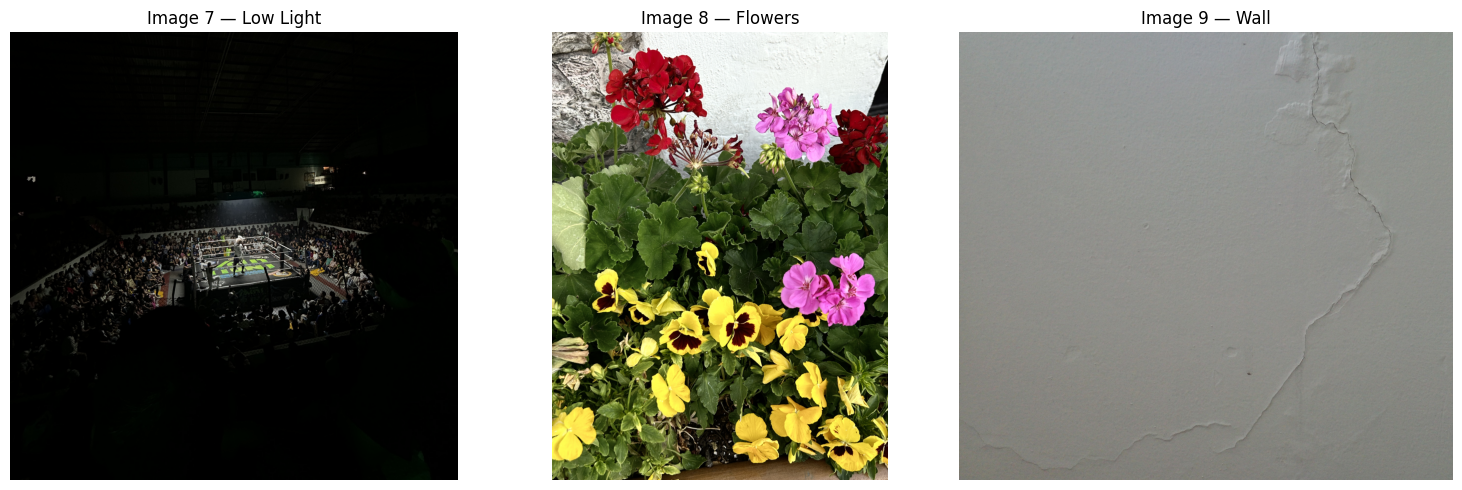

In [5]:
# ================================================================
# Loading Images (img7, img8, img9)
# ------------------------------------------------
# En esta sección cargamos las tres imágenes seleccionadas
# para el procesamiento con HE y CLAHE.
# ================================================================

# Load images
try:
    img7 = mpimg.imread('data/img7.JPEG')   # Evento deportivo (low-light)
    img8 = mpimg.imread('data/img8.JPEG')   # Flores (contraste y color)
    img9 = mpimg.imread('data/img9.JPG')    # Pared (bajo contraste homogéneo)

    print("Images loaded successfully!")
    print("Image 7 shape:", img7.shape)
    print("Image 8 shape:", img8.shape)
    print("Image 9 shape:", img9.shape)
except FileNotFoundError as e:
    print(f"Error loading images: {e}")
    # Handle gracefully if images are not found
    img7, img8, img9 = None, None, None

# Display the selected images
if img7 is not None and img8 is not None and img9 is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img7)
    axes[0].set_title('Image 7 — Low Light')
    axes[0].axis('off')

    axes[1].imshow(img8)
    axes[1].set_title('Image 8 — Flowers')
    axes[1].axis('off')

    axes[2].imshow(img9)
    axes[2].set_title('Image 9 — Wall')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


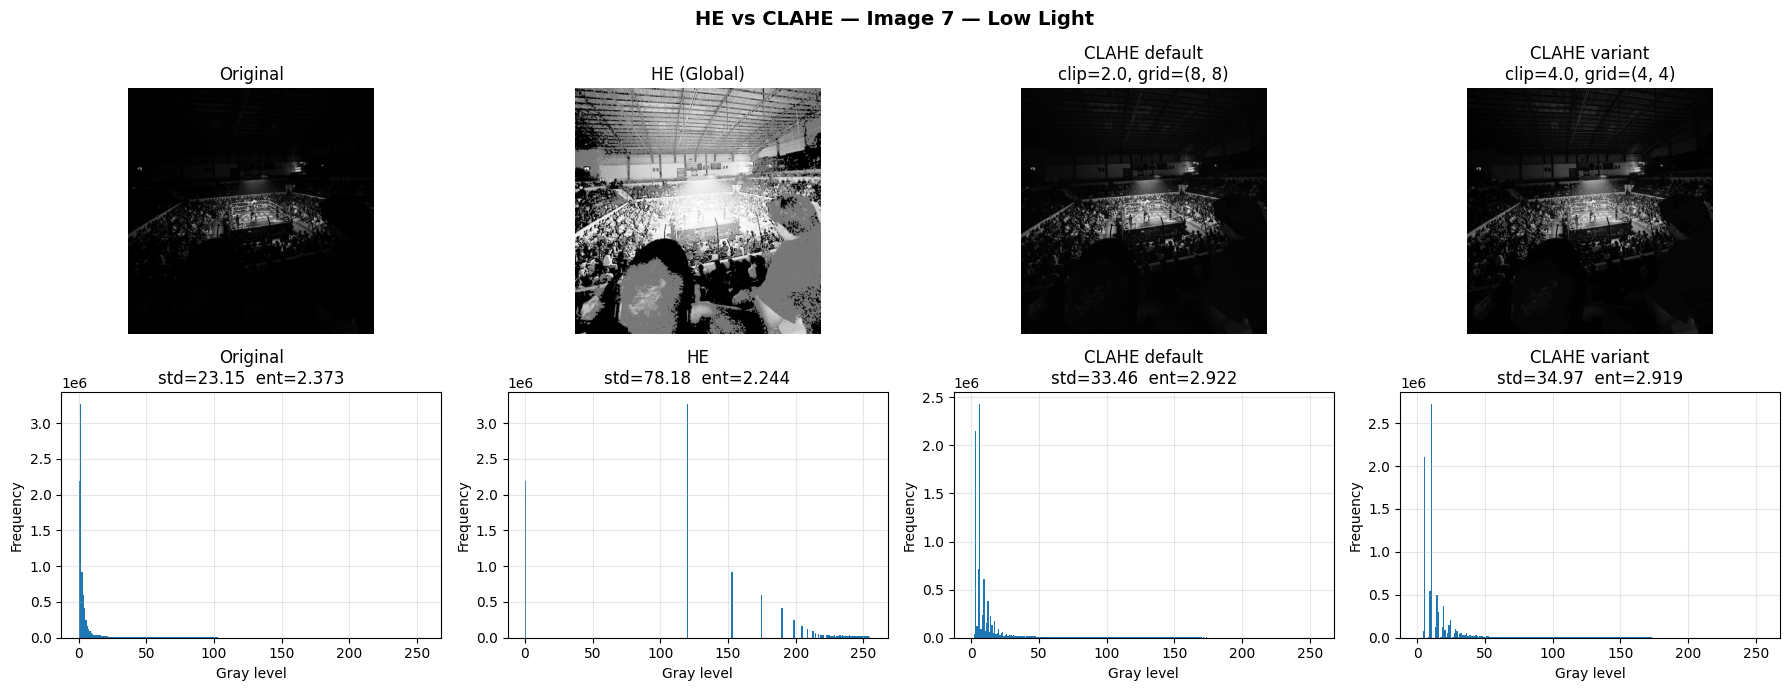

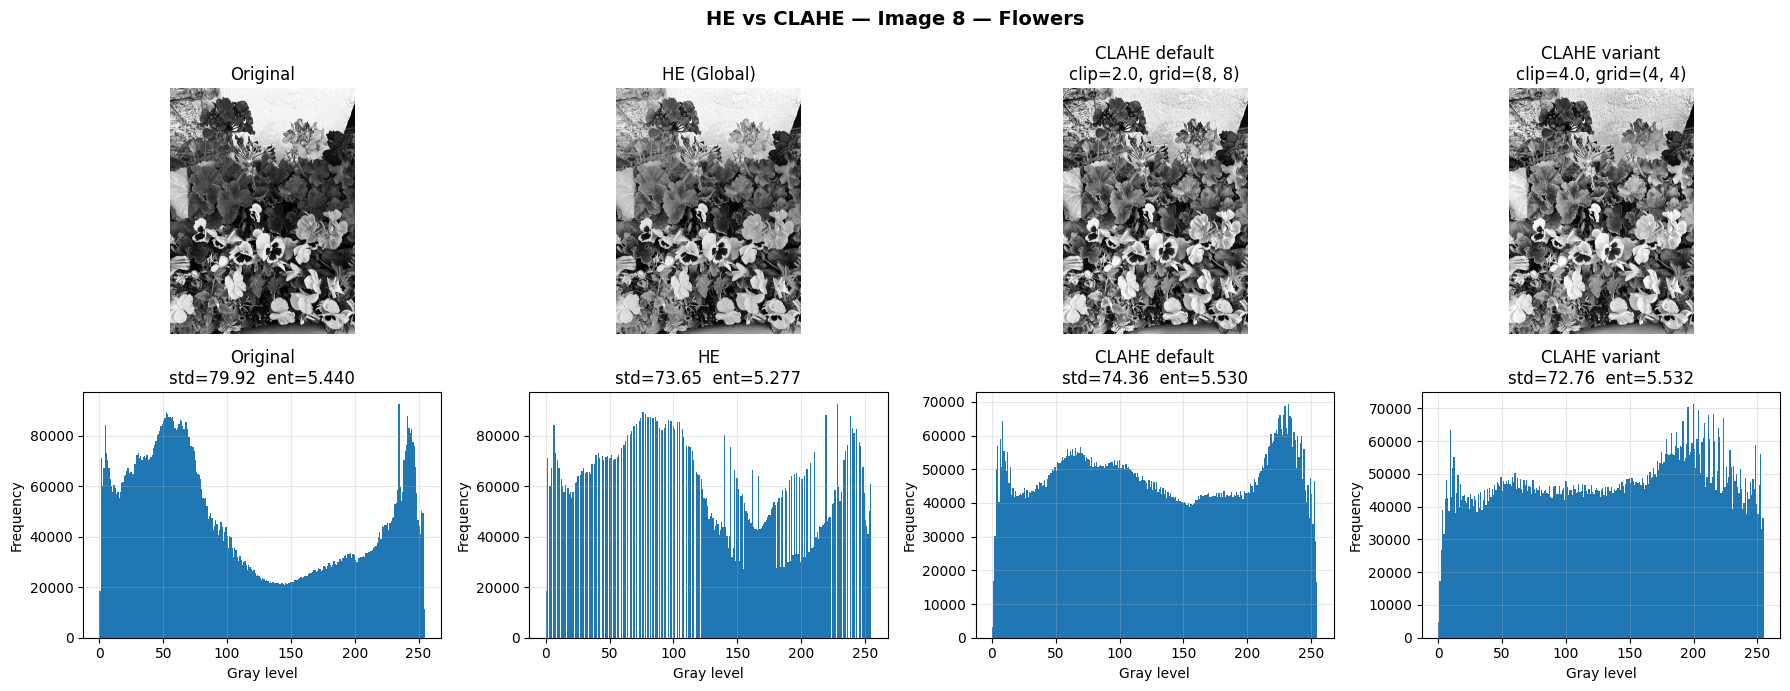

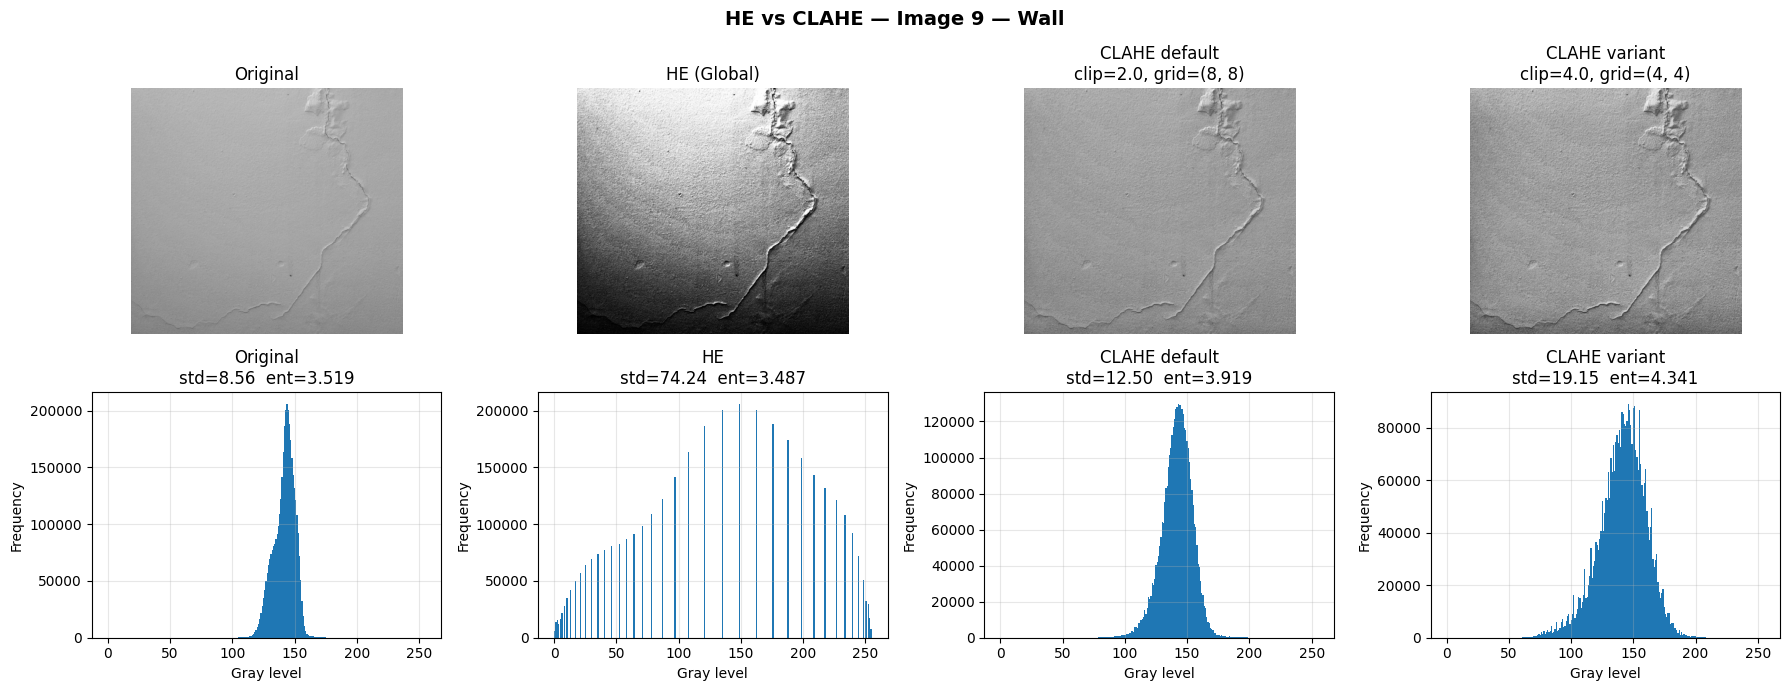


=== Comparison Summary (std / entropy) ===
Image                  | Method          |      std |  entropy | clip       | grid      
--------------------------------------------------------------------------------
Image 7 — Low Light    | Original        |    23.15 |    2.373 | —          | —         
Image 7 — Low Light    | HE (global)     |    78.18 |    2.244 | —          | —         
Image 7 — Low Light    | CLAHE default   |    33.46 |    2.922 | clip=2.0   | grid=(8, 8)
Image 7 — Low Light    | CLAHE variant   |    34.97 |    2.919 | clip=4.0   | grid=(4, 4)
Image 8 — Flowers      | Original        |    79.92 |    5.440 | —          | —         
Image 8 — Flowers      | HE (global)     |    73.65 |    5.277 | —          | —         
Image 8 — Flowers      | CLAHE default   |    74.36 |    5.530 | clip=2.0   | grid=(8, 8)
Image 8 — Flowers      | CLAHE variant   |    72.76 |    5.532 | clip=4.0   | grid=(4, 4)
Image 9 — Wall         | Original        |     8.56 |    3.519 | —    

In [ ]:
# ================================================================
# — Procesamiento de imágenes con HE y CLAHE (comparación)
# ---------------------------------------------------------------
# En esta sección se implementa la comparación entre:
#   1. La imagen original en escala de grises.
#   2. Histogram Equalization (HE) global.
#   3. CLAHE con configuración por defecto.
#   4. CLAHE con configuración alternativa (clip limit mayor y bloques más pequeños).
#
# El objetivo es observar cómo varía la distribución del histograma
# y los indicadores cuantitativos (desviación estándar y entropía),
# mostrando en una misma figura la imagen resultante y su histograma.
# ================================================================

# ------------------------------
# Funciones auxiliares
# ------------------------------

def to_uint8(img):
    """
    Convierte la imagen a formato uint8 [0,255].
    Si la imagen se encuentra en flotantes [0,1], realiza la conversión.
    Esto asegura compatibilidad con OpenCV en las operaciones posteriores.
    """
    return (img * 255).astype(np.uint8) if img.dtype.kind == "f" else img.astype(np.uint8)

def image_entropy(img_uint8):
    """
    Calcula la entropía del histograma de la imagen.
    La entropía mide el grado de dispersión de los niveles de gris,
    reflejando la cantidad de información contenida en la imagen.
    Valores más altos implican mayor diversidad tonal.
    """
    hist = cv2.calcHist([img_uint8], [0], None, [256], [0, 256]).ravel()
    p = hist / (hist.sum() + 1e-12)   # normalización a distribución de probabilidad
    p = p[p > 0]                      # se eliminan ceros para evitar log indefinidos
    return float(-(p * np.log(p)).sum())

def show_hist(ax, img, title):
    """
    Grafica el histograma de una imagen en escala de grises.
    Se utiliza para visualizar la redistribución de intensidades
    después de aplicar HE o CLAHE.
    """
    ax.hist(img.ravel(), bins=256, range=(0, 255))
    ax.set_title(title)
    ax.set_xlabel("Gray level")
    ax.set_ylabel("Frequency")
    ax.grid(alpha=0.3)

# ------------------------------
# Conversión a escala de grises
# ------------------------------
# Las técnicas de HE y CLAHE operan sobre imágenes en un solo canal.
# Se convierte cada imagen a escala de grises para aplicar las transformaciones.
# ------------------------------
assert img7 is not None and img8 is not None and img9 is not None, "Las imágenes deben cargarse primero."

imgs_rgb  = [img7, img8, img9]
titles    = ["Image 7 — Low Light", "Image 8 — Flowers", "Image 9 — Wall"]
imgs_gray = [cv2.cvtColor(to_uint8(im), cv2.COLOR_RGB2GRAY) for im in imgs_rgb]

# ------------------------------
# Configuración de CLAHE
# ------------------------------
# - Configuración por defecto: clipLimit=2.0, grid=(8x8).
# - Variante: clipLimit=4.0, grid=(4x4).
# Estas configuraciones permiten comparar cómo la limitación de contraste
# y el tamaño de las teselas afectan la mejora de la imagen.
# ------------------------------
clahe_cfg_default = {"clip": 2.0, "grid": (8, 8)}
clahe_cfg_variant = {"clip": 4.0, "grid": (4, 4)}

# ------------------------------
# Procesamiento principal
# ------------------------------
# Para cada imagen:
#   1. Se calculan métricas del original (desviación estándar y entropía).
#   2. Se aplica HE (global).
#   3. Se aplica CLAHE en dos configuraciones.
#   4. Se muestran las imágenes y sus histogramas.
#   5. Se almacenan las métricas en una tabla comparativa.
# ------------------------------
summary_rows = []

for gimg, title in zip(imgs_gray, titles):

    # --- Imagen original ---
    orig_std = float(np.std(gimg))
    orig_ent = image_entropy(gimg)

    # --- Histogram Equalization (HE) global ---
    he_img  = cv2.equalizeHist(gimg)
    he_std  = float(np.std(he_img))
    he_ent  = image_entropy(he_img)

    # --- CLAHE (configuración por defecto) ---
    clahe_d = cv2.createCLAHE(clipLimit=clahe_cfg_default["clip"],
                              tileGridSize=clahe_cfg_default["grid"]).apply(gimg)
    d_std   = float(np.std(clahe_d))
    d_ent   = image_entropy(clahe_d)

    # --- CLAHE (configuración variante) ---
    clahe_v = cv2.createCLAHE(clipLimit=clahe_cfg_variant["clip"],
                              tileGridSize=clahe_cfg_variant["grid"]).apply(gimg)
    v_std   = float(np.std(clahe_v))
    v_ent   = image_entropy(clahe_v)

    # --- Visualización comparativa ---
    # Se generan figuras con 2 filas × 4 columnas:
    #   Fila 1: imágenes (Original, HE, CLAHE default, CLAHE variant).
    #   Fila 2: histogramas correspondientes.
    fig, axes = plt.subplots(2, 4, figsize=(18, 7))
    fig.suptitle(f"HE vs CLAHE — {title}", fontsize=14, fontweight="bold")

    # Fila 1: imágenes
    axes[0, 0].imshow(gimg, cmap="gray");    axes[0, 0].set_title("Original"); axes[0, 0].axis("off")
    axes[0, 1].imshow(he_img, cmap="gray");  axes[0, 1].set_title("HE (Global)"); axes[0, 1].axis("off")
    axes[0, 2].imshow(clahe_d, cmap="gray"); axes[0, 2].set_title(f"CLAHE default\nclip={clahe_cfg_default['clip']}, grid={clahe_cfg_default['grid']}"); axes[0, 2].axis("off")
    axes[0, 3].imshow(clahe_v, cmap="gray"); axes[0, 3].set_title(f"CLAHE variant\nclip={clahe_cfg_variant['clip']}, grid={clahe_cfg_variant['grid']}"); axes[0, 3].axis("off")

    # Fila 2: histogramas
    show_hist(axes[1, 0], gimg,   f"Original\nstd={orig_std:.2f}  ent={orig_ent:.3f}")
    show_hist(axes[1, 1], he_img, f"HE\nstd={he_std:.2f}  ent={he_ent:.3f}")
    show_hist(axes[1, 2], clahe_d,f"CLAHE default\nstd={d_std:.2f}  ent={d_ent:.3f}")
    show_hist(axes[1, 3], clahe_v,f"CLAHE variant\nstd={v_std:.2f}  ent={v_ent:.3f}")

    plt.tight_layout()
    plt.show()

    # --- Registro de resultados para la tabla comparativa ---
    summary_rows += [
        (title, "Original",       orig_std, orig_ent, "—", "—"),
        (title, "HE (global)",    he_std,   he_ent,   "—", "—"),
        (title, "CLAHE default",  d_std,    d_ent,    f"clip={clahe_cfg_default['clip']}",  f"grid={clahe_cfg_default['grid']}"),
        (title, "CLAHE variant",  v_std,    v_ent,    f"clip={clahe_cfg_variant['clip']}",  f"grid={clahe_cfg_variant['grid']}"),
    ]

# ------------------------------
# Tabla resumen de resultados
# ------------------------------
# Se presenta un cuadro con:
#   - Nombre de la imagen.
#   - Método aplicado.
#   - Desviación estándar (std).
#   - Entropía (ent).
#   - Parámetros de CLAHE (si aplican).
# ------------------------------
print("\n=== Comparison Summary (std / entropy) ===")
print(f"{'Image':<22} | {'Method':<15} | {'std':>8} | {'entropy':>8} | {'clip':<10} | {'grid':<10}")
print("-"*80)
for row in summary_rows:
    img_name, method, s, e, clip, grid = row
    print(f"{img_name:<22} | {method:<15} | {s:8.2f} | {e:8.3f} | {clip:<10} | {grid:<10}")


## Results  

The comparative analysis between global Histogram Equalization (HE) and Contrast Limited Adaptive Histogram Equalization (CLAHE) is presented through three case studies: a scene under low-light conditions (Image 7), a set of flowers with naturally high contrast and strong color presence (Image 8), and a homogeneous wall with low contrast (Image 9). The evaluation metrics employed were the standard deviation (σ), associated with the global contrast of the image, and entropy (H), related to the amount of information and the distribution of gray levels.  

Across the three test cases, the results show that global Histogram Equalization (HE) tends to excessively stretch the histogram, yielding very high standard deviation values (e.g., σ = 78.18 in the low-light image and σ = 74.24 in the homogeneous wall), but often at the expense of entropy reduction, indicating loss of tonal diversity and the introduction of visual artifacts. In contrast, CLAHE consistently produced a more balanced enhancement: in low-light and homogeneous images it increased both contrast and entropy (e.g., from H = 2.373 to H ≈ 2.92 in the low-light case, and from H = 3.519 to H = 4.341 in the wall), revealing hidden details without saturation; while in the high-contrast flower image, CLAHE preserved and slightly improved entropy (H = 5.532) without degrading the natural tonal distribution, unlike HE which reduced it (H = 5.277). Overall, the numerical evidence confirms that CLAHE achieves controlled local contrast enhancement and better information retention compared to the global and often unstable behavior of HE.  

The experimental comparison between global Histogram Equalization (HE) and Contrast Limited Adaptive Histogram Equalization (CLAHE) demonstrates that while HE is effective in globally redistributing pixel intensities, it often leads to over-amplification of contrast and a reduction in entropy, which results in loss of tonal diversity and the introduction of artifacts, particularly in homogeneous or low-light images (Wang & Yang, 2024). On the other hand, CLAHE consistently provides a more controlled and adaptive enhancement, improving both contrast and entropy in challenging scenarios while preserving natural tonal distributions in already high-contrast images (Mohammed & Isa, 2025; Soni & Waoo, 2025). These results confirm that CLAHE is a more robust and versatile approach for practical applications, particularly in domains such as medical imaging, low-light photography, and remote sensing, where the preservation of fine details and controlled noise amplification are critical.  


## Bibliography

- **Zuiderveld, K. (1994). Contrast-limited adaptive histogram equalization. In *Graphics Gems IV* (pp. 474–485). Academic Press.**
- **OpenCV Documentation.**
- **Digital Image Processing, 4th Edition, by Rafael C. Gonzalez and Richard E. Woods.**
- **Majid Mohammed, I., & Ashidi Mat Isa, N. (2025). Contrast Limited Adaptive Local Histogram Equalization Method for Poor Contrast Image Enhancement. IEEE Access, 13, 62600–62632. https://doi.org/10.1109/ACCESS.2025.3558506**
- **Soni, L. N., & Waoo, A. A. (2025). Face Detection Under Low-Light and Low-Resolution Conditions Using Contrast-Limited Adaptive Histogram Equalization and a Modified Convolutional Neural Network. Journal of Neonatal Surgery, 14(32s), 2620–2631. https://doi.org/10.63682/jns.v14i32s.7793**
- **Wang, W., & Yang, Y. (2024). A histogram equalization model for color image contrast enhancement. Signal, Image and Video Processing, 18(2), 1725–1732. https://doi.org/10.1007/s11760-023-02881-9**
- **Ochoa Ruiz, G. (2025). Ecualización por histogramas. Computer Science Dept., Advanced AI Research Group, Tecnológico de Monterrey. [Class presentation].**
